In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings

import seaborn as sns

In [5]:
warnings.filterwarnings('ignore')

In [6]:
columns_names = ["user_id","item_id","rating","timestamp"]
data = pd.read_csv("ml-100k/u.data",sep = '\t',names = columns_names)

In [7]:
print(data.head())
print(data.shape)

   user_id  item_id  rating  timestamp
0      196      242       3  881250949
1      186      302       3  891717742
2       22      377       1  878887116
3      244       51       2  880606923
4      166      346       1  886397596
(100000, 4)


In [8]:
data['user_id'].nunique()

943

In [9]:
data['item_id'].nunique()

1682

In [16]:
movie_titles = pd.read_csv("ml-100k/u.item",sep = '\|',encoding='latin-1',header = None)

In [18]:
movie_titles = movie_titles[[0,1]]
movie_titles.columns = ['item_id','title']

In [20]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [22]:
df = pd.merge(data,movie_titles,on='item_id')

In [24]:
df.head()

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [26]:
df.groupby('title').mean()['rating'].sort_values(ascending = False).head()

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: rating, dtype: float64

In [28]:
df.groupby('title').count()['rating'].sort_values(ascending= False)

title
Star Wars (1977)                      583
Contact (1997)                        509
Fargo (1996)                          508
Return of the Jedi (1983)             507
Liar Liar (1997)                      485
                                     ... 
Great Day in Harlem, A (1994)           1
Other Voices, Other Rooms (1997)        1
Good Morning (1971)                     1
Girls Town (1996)                       1
Á köldum klaka (Cold Fever) (1994)      1
Name: rating, Length: 1664, dtype: int64

In [30]:
ratings = pd.DataFrame(df.groupby('title').mean()['rating'])

In [32]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('title').count()['rating'])

In [34]:
ratings.sort_values(by = 'rating',ascending = False)

,rating,num of ratings
title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
...,...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0,1
King of New York (1990),1.0,1
Touki Bouki (Journey of the Hyena) (1973),1.0,1


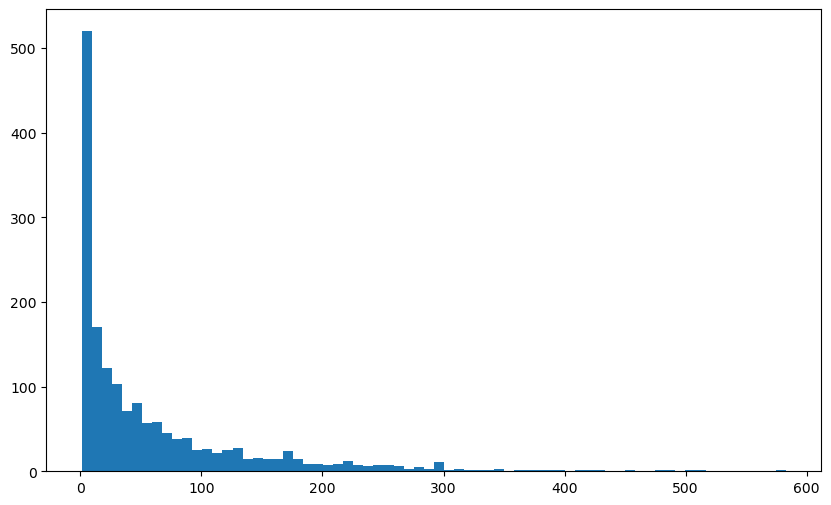

In [36]:
plt.figure(figsize = (10,6))
plt.hist(ratings['num of ratings'],bins = 70)
plt.show()

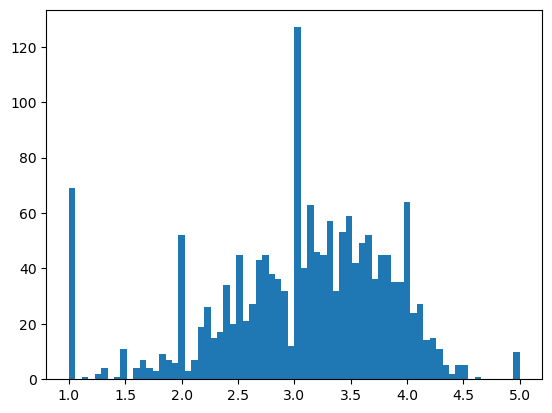

In [38]:
plt.hist(ratings['rating'],bins = 70)
plt.show()

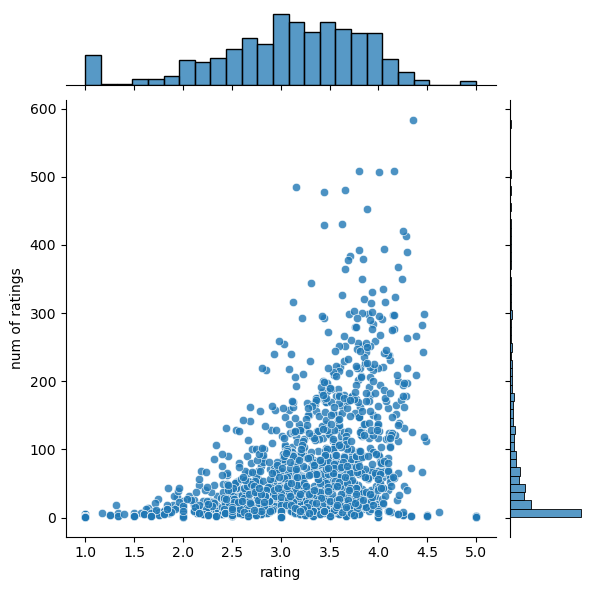

In [40]:
sns.jointplot(x='rating' ,y='num of ratings' ,data = ratings,alpha = 0.8)


In [42]:
moviematrix = df.pivot_table(index='user_id',columns='title',values = 'rating')

In [46]:
duplicates = df[df.duplicated(subset=['user_id'])]
print(duplicates)

       user_id  item_id  rating  timestamp  \
122        206      302       5  888180227   
127        181      302       2  878961511   
128        154      302       4  879138235   
130        305      302       4  886307860   
134        144      302       3  888103530   
...        ...      ...     ...        ...   
99995      840     1674       4  891211682   
99996      655     1640       3  888474646   
99997      655     1637       3  888984255   
99998      655     1630       3  887428735   
99999      655     1641       3  887427810   

                                                   title  
122                             L.A. Confidential (1997)  
127                             L.A. Confidential (1997)  
128                             L.A. Confidential (1997)  
130                             L.A. Confidential (1997)  
134                             L.A. Confidential (1997)  
...                                                  ...  
99995                             

In [75]:
moviematrix.shape

(943, 1664)

In [22]:
ratings.sort_values('num of ratings', ascending=False).head()

,rating,num of ratings
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


In [23]:
starwars_user_ratings = moviematrix['Star Wars (1977)']
starwars_user_ratings.head()

user_id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

In [24]:
similar_to_starwars = moviematrix.corrwith(starwars_user_ratings)

In [25]:
corr_starwars = pd.DataFrame(similar_to_starwars,columns = ['Correlation'])

In [26]:
corr_starwars.dropna(inplace = True)

In [27]:
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [28]:
corr_starwars.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [29]:
corr_starwars

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns (1988),0.186377
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374


In [30]:
corr_starwars = corr_starwars.join(ratings['num of ratings'])


In [31]:
corr_starwars.head()

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [32]:
corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation',ascending=False).head(10)

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115


In [33]:
def predict_movies(movie_name):
    movie_user_ratings = moviematrix[movie_name]
    similar_to_movie = moviematrix.corrwith(movie_user_ratings)
    corr_movie = pd.DataFrame(similar_to_movie,columns = ['Correlation'])
    corr_movie.dropna(inplace = True)
    corr_movie = corr_movie.join(ratings['num of ratings'])
    predictions = corr_movie[corr_movie['num of ratings']>100].sort_values('Correlation',ascending=False).head(10)
    return predictions

In [34]:
predictions = predict_movies('Toy Story (1995)')

In [35]:
predictions.head(10)

,Correlation,num of ratings
title,,
Toy Story (1995),1.000000,452
"Craft, The (1996)",0.549100,104
Down Periscope (1996),0.457995,101
Miracle on 34th Street (1994),0.456291,101
G.I. Jane (1997),0.454756,175
Amistad (1997),0.449915,124
Beauty and the Beast (1991),0.442960,202
"Mask, The (1994)",0.432855,129
Cinderella (1950),0.428372,129


In [79]:
df.shape

(100000, 5)